## OpenCV做影像處理時的細節
1. RGB通道順序
2. 通道運算
3. 座標系

## RGB通道順序

先前已經提到過在OpenCV中，讀取照片後預設以BGR的順序存入numpy陣列中，但是在圖像輸出時，matplotlib預設使用RGB的順序，所以照片顯示時藍色和紅色會調換，我們看到照片就是錯誤的顏色。

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import cv2
%matplotlib inline

In [2]:
print('openCV version:', cv2.__version__)
print('python version:', sys.version)

openCV version: 3.4.1
python version: 3.5.2 (default, Sep 14 2017, 22:51:06) 
[GCC 5.4.0 20160609]


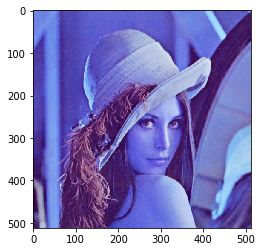

In [3]:
# 讀取照片，不轉換為RGB
img_BGR = cv2.imread('data/Lenna.png')
plt.imshow(img_BGR)
plt.show()

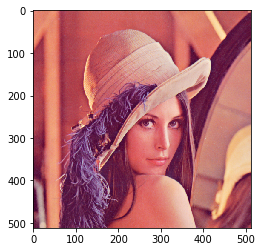

In [4]:
# 轉換為RGB後再輸出
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)
plt.show()

In [5]:
# 將照片存檔看看
cv2.imwrite('data/Lenna_RGB.jpg', img_RGB)
cv2.imwrite('data/Lenna_BGR.jpg', img_BGR)

True

>存檔後會發現，BGR格式存檔後才是正確的顏色，而OpenCV中的所有要設定顏色的方法，也都是使用BGR的格式。
>所以除非要在筆記本上顯示圖片，否則盡可能保持圖片格式為BGR，以免經過多次轉換後容易搞混。

## 通道運算
透過OpenCV函式庫，我們可以輕易的將通道做切分或合併。

以下分別使用numpy陣列及OpenCV函式庫做簡單的通道拆分及合併。

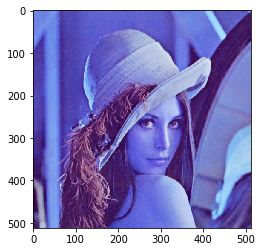

In [6]:
# 讀取照片，不轉換為RGB
img_BGR = cv2.imread('data/Lenna.png')
plt.imshow(img_BGR)
plt.show()

In [7]:
# 由陣列方式取得三個通道
b = img_BGR[:, :, 0]
g = img_BGR[:, :, 1]
r = img_BGR[:, :, 2]

In [8]:
# 將陣列合併為RGB的通道順序
img_RGB = np.zeros((512, 512, 3), dtype=np.uint8)
img_RGB[:, :, 0] = r
img_RGB[:, :, 1] = g
img_RGB[:, :, 2] = b

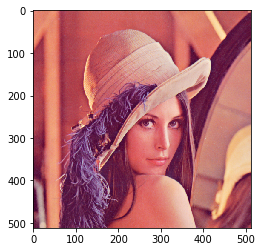

In [9]:
# 成功手動將通道轉換了
plt.imshow(img_RGB)
plt.show()

In [10]:
# 利用OpenCV函式庫取得三個通道
b, g, r = cv2.split(img_BGR)
img_RGB = cv2.merge([r, g, b])

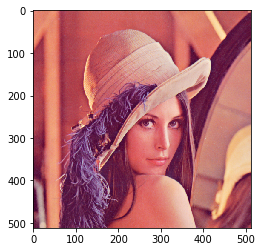

In [11]:
# 成功手動將通道轉換了
plt.imshow(img_RGB)
plt.show()

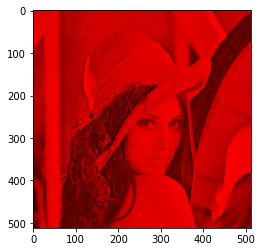

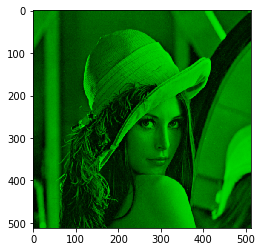

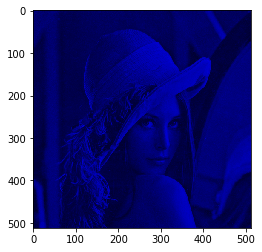

In [12]:
# 看看只保留r,g,b其中之一的通道數值，圖片長得如何
for i in range(3):
    img = np.zeros((512, 512, 3), dtype=np.uint8)
    img[:, :, i] = img_RGB[:, :, i]
    plt.imshow(img)
    plt.show()

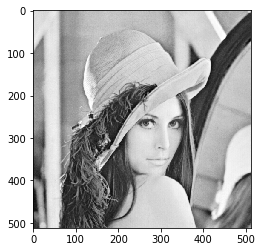

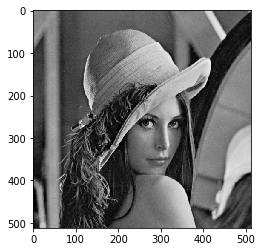

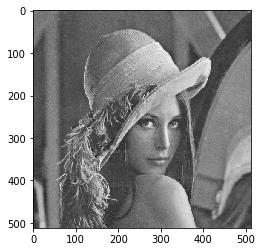

In [13]:
# 看看只取出r,g,b其中之一的通道數值，當作灰階影像顯示長得如何
for i in range(3):
    img_gray = img_RGB[:, :, i]
    plt.imshow(img_gray, cmap = 'gray')
    plt.show()

## OpenCV中的座標軸

我們理解的座標軸:
![Imgur](https://i.imgur.com/F9YhH8S.png)
OpenCV中的座標軸:
![Imgur](https://i.imgur.com/tzzExXc.png)

>可以發現我們理解的座標軸原點應為圖片的左下角，但是OpenCV中的方法所定義的座標則將原點訂為圖片的左上角，其實在matplotlib顯示的圖片座標軸的原點也是在左上角。

以下我們自己定義一張圖片來做實驗。

In [14]:
# 自訂一張11*11的灰階圖片(通道數為一)
img_gray = np.array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                     [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                     [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                     [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                     [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                     [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                     [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                     [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                     [255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0],
                     [255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0],
                     [255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0]], dtype=np.uint8)

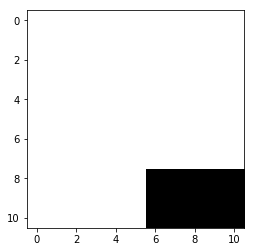

In [15]:
# 顯示此圖片
plt.imshow(img_gray, cmap = 'gray')
plt.show()

將圖片顯示出來後會發現，圖片黑色位置與陣列位置一樣，看得出來圖片讀取後轉為numpy陣列時是將圖片一列一列存放，所以要找到指定的pixel需要先指定列的index再指定行的index，以下示範將黑色區域正中間的pixel轉為白色(第8行、第9列)。

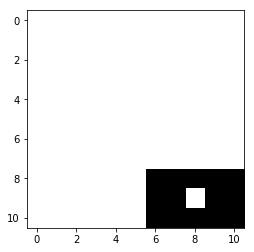

In [16]:
img_gray[9][8] = 255
plt.imshow(img_gray, cmap = 'gray')
plt.show()

## 嵌入文字到圖片中

嵌入文字到圖片中需要指定嵌入的座標以及顏色，剛好可以練習以上提到的兩個細節(座標軸對應XY座標、BGR顏色設定)。

方法介紹:

`cv2.putText(圖片陣列, 嵌入文字, 座標, 字體, 字體大小, 顏色, 字體粗細, 字體類型)`

字體包含:

1. FONT_HERSHEY_SIMPLEX
2. FONT_HERSHEY_PLAIN
3. FONT_HERSHEY_DUPLEX
4. FONT_HERSHEY_COMPLEX
5. FONT_HERSHEY_TRIPLEX
6. FONT_HERSHEY_COMPLEX_SMALL
7. FONT_HERSHEY_SCRIPT_SIMPLEX
8. FONT_HERSHEY_SCRIPT_COMPLEX
9. FONT_ITALIC

可以於下方範例中替換看看效果。

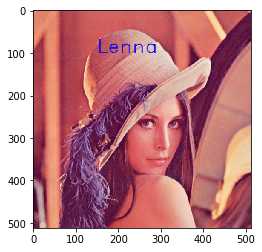

In [17]:
# 在帽子上寫一個藍色Lenna
img_BGR = cv2.imread('data/Lenna.png')
cv2.putText(img_BGR, 'Lenna', (150, 100), cv2.FONT_HERSHEY_DUPLEX, 1.5, (255, 0, 0), 1, cv2.LINE_AA)
img_text = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
plt.imshow(img_text)
plt.show()